In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

import datetime

import pylab  as pl 
import pandas as pd
import numpy  as np

In [2]:
index = pd.read_json("https://archive.analytics.mybinder.org/index.jsonl",
                     lines=True)

In [4]:
# get all days since start of June 2020.
now = datetime.datetime.now()
n   = (now - datetime.datetime(2020, 7, 1)).days

frames = []

count  = 0

for idx, day in index.sort_index(ascending=False).iterrows():
    df = pd.read_json("https://archive.analytics.mybinder.org/{}".format(day['name']), lines=True)
    frames.append(df)

    if len(frames) > n:
        break

    print(count, n)
    
    count += 1
        
print(f"Fetched data for {n} days.")

0 60
1 60
2 60
3 60
4 60
5 60
6 60
7 60
8 60
9 60
10 60
11 60
12 60
13 60
14 60
15 60
16 60
17 60
18 60
19 60
20 60
21 60
22 60
23 60
24 60
25 60
26 60
27 60
28 60
29 60
30 60
31 60
32 60
33 60
34 60
35 60
36 60
37 60
38 60
39 60
40 60
41 60
42 60
43 60
44 60
45 60
46 60
47 60
48 60
49 60
50 60
51 60
52 60
53 60
54 60
55 60
56 60
57 60
58 60
59 60
Fetched data for 60 days.


In [5]:
df = pd.concat(frames)

In [6]:
# make it easier to grab the ref
def get_repo(spec):
    s = spec.rsplit("/", 1)[0]
    if s.endswith('.git'):
        s = s[:-4]
    return s

df['repo'] = df['spec'].apply(get_repo) #lambda s: s.rsplit("/", 1)[0].replace(".git", ""))
df['org'] = df['spec'].apply(lambda s: s.split("/", 1)[0])

In [7]:
# take a look at the data, does it look sensible?
df.sample(10)

,timestamp,schema,version,provider,spec,ref,status,origin,repo,org
17134,2020-07-06 18:54:00+00:00,binderhub.jupyter.org/launch,4,GitHub,gcpeixoto/FMECD/master,175bb83cac07fe045deb8106a8ee924037e11f50,success,gke.mybinder.org,gcpeixoto/FMECD,gcpeixoto
9167,2020-07-23 12:12:00+00:00,binderhub.jupyter.org/launch,4,GitHub,ipython/ipython-in-depth/master,7e5ce96cc9251083979efdfc393425f1229a4a68,success,gke.mybinder.org,ipython/ipython-in-depth,ipython
8463,2020-08-10 12:05:00+00:00,binderhub.jupyter.org/launch,4,GitHub,jupyterlab/jupyterlab-demo/try.jupyter.org,71b616307dcb9cba18262d8e5fa46ad828ca51e4,success,gke.mybinder.org,jupyterlab/jupyterlab-demo,jupyterlab
3765,2020-07-02 05:44:00+00:00,binderhub.jupyter.org/launch,4,GitHub,ipython/ipython-in-depth/master,7e5ce96cc9251083979efdfc393425f1229a4a68,success,gesis.mybinder.org,ipython/ipython-in-depth,ipython
16442,2020-08-13 19:42:00+00:00,binderhub.jupyter.org/launch,4,GitHub,binder-examples/demo-julia/master,3fb845fa982490984e036bb7790b2fa56e79d9d9,success,gke.mybinder.org,binder-examples/demo-julia,binder-examples
17450,2020-08-10 22:45:00+00:00,binderhub.jupyter.org/launch,4,GitHub,jupyterlab/jupyterlab-demo/try.jupyter.org,71b616307dcb9cba18262d8e5fa46ad828ca51e4,success,gke.mybinder.org,jupyterlab/jupyterlab-demo,jupyterlab
6609,2020-08-08 12:03:00+00:00,binderhub.jupyter.org/launch,4,GitHub,ipython/ipython-in-depth/master,7e5ce96cc9251083979efdfc393425f1229a4a68,success,gke.mybinder.org,ipython/ipython-in-depth,ipython
15138,2020-07-01 17:59:00+00:00,binderhub.jupyter.org/launch,4,GitHub,c3-e/c3aidatalake-notebooks/master,6e551993bb87d8a106aa574118b3842aa5257d01,success,gesis.mybinder.org,c3-e/c3aidatalake-notebooks,c3-e
5289,2020-08-07 07:39:00+00:00,binderhub.jupyter.org/launch,4,GitHub,jupyterlab/jupyterlab-demo/try.jupyter.org,71b616307dcb9cba18262d8e5fa46ad828ca51e4,success,gke.mybinder.org,jupyterlab/jupyterlab-demo,jupyterlab
8163,2020-08-27 09:10:00+00:00,binderhub.jupyter.org/launch,4,Git,https%3A%2F%2Fjovian.ml%2Fapi%2Fgit%2Fa132e51f...,24e435323de4c232d5bd5ad95816612cc7c37097,success,gesis.mybinder.org,https%3A%2F%2Fjovian.ml%2Fapi%2Fgit%2Fa132e51f...,https%3A%2F%2Fjovian.ml%2Fapi%2Fgit%2Fa132e51f...


In [8]:
df = df.drop(columns=['schema', 'version', 'spec', 'ref'])

In [9]:
df.sample(10)

,timestamp,provider,status,origin,repo,org
17743,2020-07-29 20:45:00+00:00,GitHub,success,ovh.mybinder.org,explosion/spacy-io-binder,explosion
879,2020-07-16 01:49:00+00:00,GitHub,success,gke.mybinder.org,jupyterlab/jupyterlab-demo,jupyterlab
13324,2020-07-17 16:48:00+00:00,GitHub,success,gke.mybinder.org,jupyterlab/jupyterlab-demo,jupyterlab
15378,2020-08-24 16:32:00+00:00,GitHub,success,gke.mybinder.org,pedagogly/second,pedagogly
2941,2020-07-02 04:41:00+00:00,GitHub,success,gke.mybinder.org,jupyterlab/jupyterlab-demo,jupyterlab
15357,2020-07-13 17:32:00+00:00,GitHub,success,gke.mybinder.org,martinRenou/ipycanvas,martinRenou
9273,2020-07-21 11:01:00+00:00,GitHub,success,gke.mybinder.org,jupyterlab/jupyterlab-demo,jupyterlab
3754,2020-07-12 07:52:00+00:00,GitHub,success,gesis.mybinder.org,ipython/ipython-in-depth,ipython
10684,2020-07-07 12:54:00+00:00,GitHub,success,gesis.mybinder.org,explosion/spacy-io-binder,explosion
12446,2020-07-02 13:47:00+00:00,GitHub,success,gke.mybinder.org,jupyterlab/jupyterlab-demo,jupyterlab


In [10]:
np.any(df['repo'] == 'michaelJwilson/DESI-HighSchool')

True

In [11]:
ds = df[df['repo'] == 'michaelJwilson/DESI-HighSchool']

In [12]:
ds['pd_timestamp'] = pd.to_datetime(ds.timestamp)

/Users/MJWilson/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
ds.sort_values(by='pd_timestamp')

,timestamp,provider,status,origin,repo,org,pd_timestamp
2953,2020-07-09 04:59:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-07-09 04:59:00+00:00
2980,2020-07-09 05:03:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-07-09 05:03:00+00:00
3015,2020-07-09 05:04:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-07-09 05:04:00+00:00
3108,2020-07-09 05:12:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-07-09 05:12:00+00:00
3107,2020-07-09 05:12:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-07-09 05:12:00+00:00
...,...,...,...,...,...,...,...
23785,2020-08-27 23:12:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-08-27 23:12:00+00:00
383,2020-08-28 00:33:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-08-28 00:33:00+00:00
9934,2020-08-30 15:16:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-08-30 15:16:00+00:00
12025,2020-08-30 17:37:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-08-30 17:37:00+00:00


In [15]:
len(ds)

97

In [16]:
daily = ds.set_index("timestamp").resample('D').count()

In [30]:
daily.head()

,provider,status,origin,repo,org,pd_timestamp
timestamp,,,,,,
2020-07-09 00:00:00+00:00,9,9,9,9,9,9
2020-07-10 00:00:00+00:00,0,0,0,0,0,0
2020-07-11 00:00:00+00:00,3,3,3,3,3,3
2020-07-12 00:00:00+00:00,0,0,0,0,0,0
2020-07-13 00:00:00+00:00,11,11,11,11,11,11


Text(0.5, 0, '')

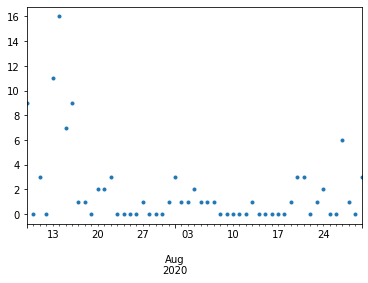

In [29]:
daily['repo'].plot(marker='.', lw=0.)

ax = pl.gca()

ax.set_xlabel('')